# ДЗ4: Power iterations и потенциальная яма

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def power_iterations(A, eps):
    x0 = np.ones(A.shape[0]) / np.sqrt(A.shape[0])
    e_val0 = x0 @ A @ x0
    while True:
        x1 = (A @ x0)/np.linalg.norm(A @ x0)
        e_val1 = x1 @ A @ x1
        if np.abs(e_val1 - e_val0) < eps:
            break
        x0 = x1
        e_val0 = e_val1
    return e_val1, x1

Проверим, что все ок. К сожалению, данный метод хорош только для поиска главного собственного значения

In [3]:
A = np.array([[1, 2, 3], [3, 2, 8],[2, 1, 7]])
print(power_iterations(A, 1e-5), (np.sort(np.linalg.eig(A)[0])[-1]))

(9.612131895425419, array([0.36823383, 0.73859414, 0.56469686])) 9.612131133106866


Получается довольно приличная точность

На семинаре мы считали гамильтониан для ямы с бесконечными стенками и численно находили собственные значения. Здесь мы слегка модифируем потенциал, добавляя горб внутри ямы. Посмотрим, что поменяется. Следует принять во внимание, что всякие размерные величины были выкинуты

In [4]:
def I(n):
    I = np.zeros((n,n))
    for i in range(1, n-1):
        for j in range(n):
            if i == j:
                I[i][j] = -2
            if j == i-1:
                I[i][j] = 1
            if j == i+1:
                I[i][j] = 1
    return(I)

In [5]:
def Hamiltonian(I, height):
    n = I.shape[0] - 1
    hill = [height*((1/(np.cosh(2 * i / n - 1))**2) - 1/(np.cosh(1))**2) for i in range(n)]
    hill.append(0)
    hill = np.array(hill)
    return I + np.diag(hill)
print(Hamiltonian(I(6), 8))

[[0.         0.         0.         0.         0.         0.        ]
 [1.         0.33282737 1.         0.         0.         0.        ]
 [0.         1.         2.32854913 1.         0.         0.        ]
 [0.         0.         1.         2.32854913 1.         0.        ]
 [0.         0.         0.         1.         0.33282737 1.        ]
 [0.         0.         0.         0.         0.         0.        ]]


In [6]:
n = 1000
x = np.linspace(1, n, n)
E0 = np.linalg.eig(I(n))[0]
E1 = np.linalg.eig(Hamiltonian(I(n), 1))[0]
E2 = np.linalg.eig(Hamiltonian(I(n), 5))[0]
E3 = np.linalg.eig(Hamiltonian(I(n), 10))[0]

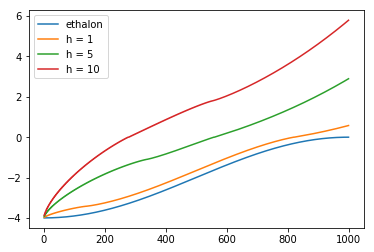

In [7]:
plt.plot(x, np.sort(E0), label = 'ethalon')
plt.plot(x, np.sort(E1), label = 'h = 1')
plt.plot(x, np.sort(E2), label = 'h = 5')
plt.plot(x, np.sort(E3), label = 'h = 10')
plt.legend()

Видно, что собственные значения меняются довольно сильно в зависимости от высоты "горба"

Ищем основное состояние системы. Для того, чтобы у нас гамильтониан имел обратную матрицу, нужно "ликвидировать" нулевые строки, поэтому поставим на первый и последний элементы на диагонали какое-то число, например, 5

In [8]:
def Hamilt_upd(I, height):
    n = I.shape[0] - 1
    p = 2/I.shape[0]
    hill = [height*((1/(np.cosh(2 * i / n - 1))**2) - 1/(np.cosh(1))**2) for i in range(n)]
    hill.append(0)
    hill = np.array(hill)
    I[0][0] = I[-1][-1] = 5
    return I/p**2 + np.diag(hill)

In [9]:
def eig (M, eps):
    return 1/np.sqrt(power_iterations(-M, eps)[0])

Тогда при различных h будут получаться следующие собственные значения

In [12]:
H_inv0 = np.linalg.inv(Hamilt_upd(I(1000), 0))
H_inv1 = np.linalg.inv(Hamilt_upd(I(1000), 1))
H_inv2 = np.linalg.inv(Hamilt_upd(I(1000), 3))
H_inv3 = np.linalg.inv(Hamilt_upd(I(1000), 5))
print('h = 0', eig(H_inv0, 1e-6), 'h = 1', eig(H_inv1, 1e-6), 'h = 3', eig(H_inv2, 1e-6), 'h = 5',eig(H_inv3, 1e-6), sep = '\n')  

h = 0
1.5723680493887495
h = 1
1.414316071466372
h = 3
1.0258210212020258
h = 5
0.3151558611327141
